In [1]:
from pandas import read_csv, read_excel, Series, concat, wide_to_long
from statistics import mean, median
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from helpers.plots import labels, theme

In [2]:
theme()

## Load cleaned data

In [3]:
g = read_csv('data/cleaned_answers.csv')
g.head(2)

,Unnamed: 0,index,Timestamp,sex,age,place_of_residence,is_polish_scout,scouting_organization,years_in_scouting,is_instructor,...,MIT_tick_jump_score,MIT_waiting_boreliosis_score,MIT_safe_score,MIT_summer_tick_score,MIT_part_tick_score,MIT_city_score,MIT_clock_score,total_score_without_images,total_score_with_images,score_as_percent
0,0,0,2018/04/27 1:36:27 PM GMT+2,Kobieta,17,Miasto powyżej 100 tys. mieszkańców,True,ZHP,11.0,True,...,1,1,1,1,1,1,1,26.2,26.2,90.344828
1,1,1,2018/04/27 1:43:31 PM GMT+2,Kobieta,18,Miasto powyżej 100 tys. mieszkańców,True,ZHP,5.0,True,...,1,1,0,1,1,1,0,22.9,22.9,78.965517


## Demographic statistics

In [4]:
scouts = g[g.is_polish_scout]
not_scouts = g[g.is_polish_scout == False]

In [5]:
h_mean = mean(scouts['total_score_without_images'])
nh_mean = mean(not_scouts['total_score_without_images'])
g_mean = mean(g['total_score_without_images'])
h_mean, nh_mean, g_mean

(23.537135720233138, 22.204674220963174, 22.686833383549263)

In [6]:
g.place_of_residence.value_counts()

Miasto powyżej 100 tys. mieszkańców     1094
Wieś                                    1016
Miasto do 50 tys. mieszkańców            765
Miasto od 50 do 100 tys. mieszkańców     444
Name: place_of_residence, dtype: int64

### Number of valid participants

In [7]:
participants_n = len(g)
participants_n

3319

### Number of women

In [8]:
g.is_women.describe()

count     3319
unique       2
top       True
freq      2650
Name: is_women, dtype: object

In [9]:
len(g[g.is_women])

2650

Majority participants were women

In [10]:
f'{round((len(g[g.is_women])/len(g))*100, 2)}% of participants were women.'

'79.84% of participants were women.'

### Number of scouts

In [11]:
g.is_polish_scout.describe()

count      3319
unique        2
top       False
freq       2118
Name: is_polish_scout, dtype: object

In [12]:
len(g[g.is_polish_scout])

1201

Only about 1/3 of participants were scouts

In [13]:
f'{round((len(g[g.is_polish_scout])/len(g))*100, 2)}% of participants were scouts.'

'36.19% of participants were scouts.'

### Age of participants

In [14]:
f'Mean age of all participants was: {round(mean(g.age), 2)} years.'

'Mean age of all participants was: 18.22 years.'

In [15]:
f'Median age of all participants was: {median(g.age)} years.'

'Median age of all participants was: 18 years.'

Mean and median age of participants are comparable so I expect little skew in the age distribution.

In [16]:
s = g.age.std()

Assuming that age distribution is normal I would expect 95% of participants to be in this age group:

In [17]:
mean(g.age) - 2 * s, mean(g.age) + 2 * s

(15.458138118576665, 20.980548232733973)

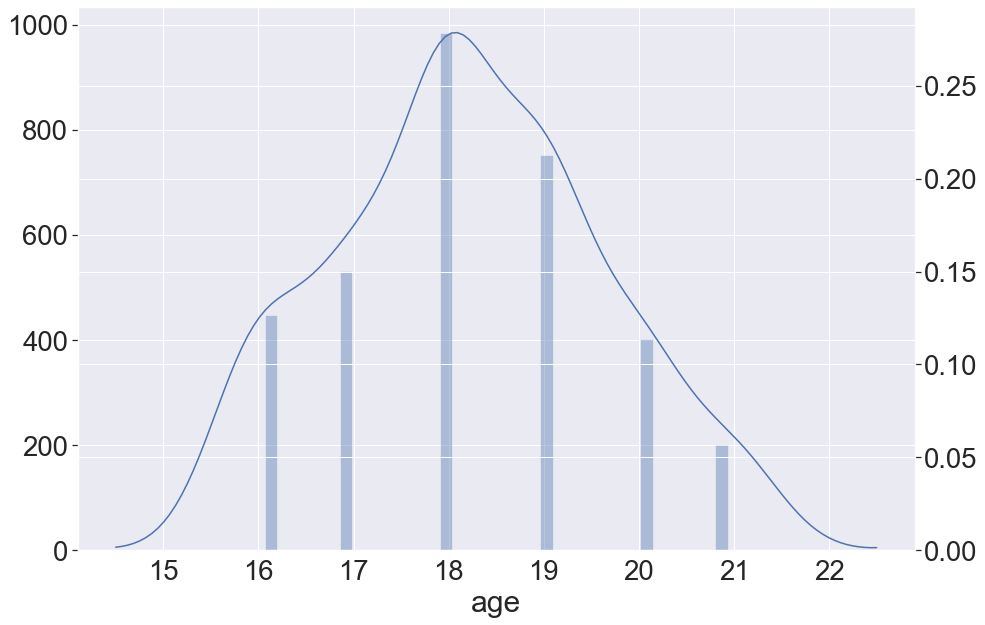

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.distplot(g.age, kde=False, ax=ax1, hist_kws={'rwidth': 0.5})
sns.distplot(g.age, hist=False, ax=ax2, kde_kws={'bw': .5});

In [19]:
g.age.describe()

count    3319.000000
mean       18.219343
std         1.380603
min        16.000000
25%        17.000000
50%        18.000000
75%        19.000000
max        21.000000
Name: age, dtype: float64

### Age distribution between scouts and control group

Those data were used in my master thesis. The data are from 2017 as 2018 data were not available at the time of writing my master thesis. Now I have decided to use 2018 data as they become available.

**Data 2017 source:** [Central Statistical Office in Poland, *Population in Poland. Size and structure by territorial division As of June 30, 2017*](https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/6/22/1/ludnosc._stan_i_struktura_w_przekroju_terytorialnym._stan_w_dniu_30.06.2017.pdf)

In [20]:
gus_2017_all = read_csv("data/gus_age_2017.csv")

- `gus_2017` - age data inferred from the 2017 report
- `gus_2018` - age data from the 2018 report

In [21]:
gus_2017_all = gus_2017_all.assign(age_in_2018=gus_2017_all.age + 1)
gus_2017 = gus_2017_all[gus_2017_all.age_in_2018 <= 21]
gus_2017.head(2)

,age,total,males,females,city_total,city_males,city_females,rural_total,rural_male,rural_female,age_in_2018
0,15,360165,184738,175427,192475,98690,93785,167690,86048,81642,16
1,16,371338,190380,180958,200959,102629,98330,170379,87751,82628,17


**Data 2018 source:** [Central Statistical Office in Poland, *Ludność. Stan i struktura oraz ruch naturalny w przekroju terytorialnym w 2018 r. Stan w dniu 31 XII*](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-oraz-ruch-naturalny-w-przekroju-terytorialnym-w-2018-r-stan-w-dniu-31-xii,6,25.html)


In [22]:
gus_2018_all = read_excel(
    "data/03_ludnosć_struktura wg wieku_RD'2019.xls",
    sheet_name="Tablica 15 ", index_col=0
)

In [23]:
gus_2018_all.iloc[[5, 6]]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
WIEK \nAGE,Ogółem Total,Mężczyźni Males,Kobiety Females,Miasta Urban areas,NaN,NaN,Wieś Rural areas,NaN,NaN
NaN,NaN,NaN,NaN,razem total,mężczyźni males,kobiety females,razem total,mężczyźni males,kobiety females


In [24]:
gus_2018 = gus_2018_all.loc[range(16, 22)]

In [25]:
gus_2018 = gus_2018.reset_index()
gus_2018.columns = (
    'age total males females city_total city_males '
    'city_females rural_total rural_male rural_female'
).split()
gus_2018.head(2)

,age,total,males,females,city_total,city_males,city_females,rural_total,rural_male,rural_female
0,16,353738,181515,172223,195234,99504,95730,158504,82011,76493
1,17,366102,187690,178412,201651,102767,98884,164451,84923,79528


In [26]:
x = np.repeat(gus_2017.age_in_2018, gus_2017.total)
y = np.repeat(gus_2018.age, gus_2018.total)

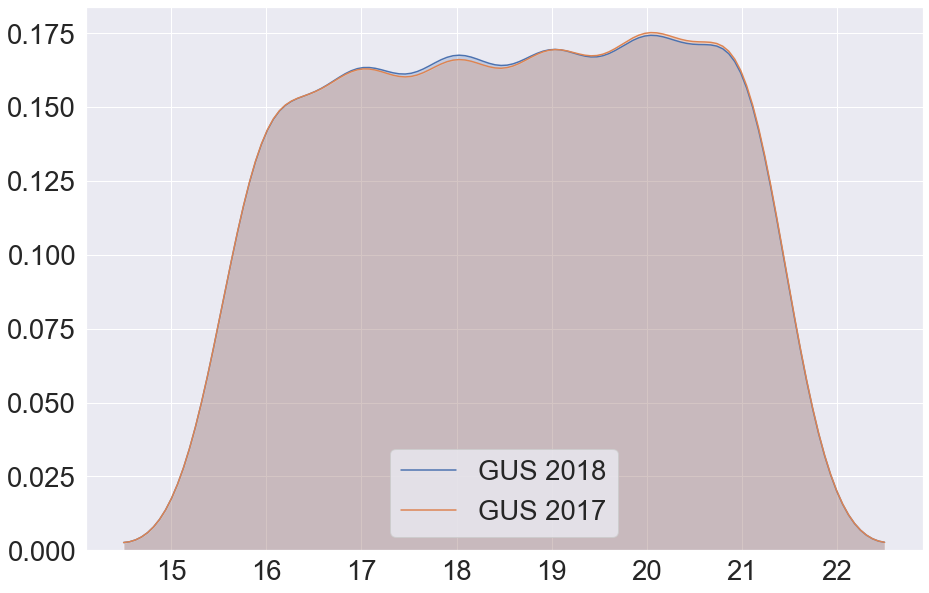

In [27]:
sns.kdeplot(y, bw=.5, label="GUS 2018", shade=True)
sns.kdeplot(x, bw=.5, label="GUS 2017", shade=True);

In [28]:
ages = Series(gus_2017.age_in_2018, name="age")
GUS_2017 = Series(gus_2017.total, name="GUS2017")
GUS_2018 = Series(gus_2018.total, name="GUS2018")
age_compare = concat([ages, GUS_2017, GUS_2018], axis=1)
age_compare.head(2)

,age,GUS2017,GUS2018
0,16,360165,353738
1,17,371338,366102


In [29]:
age_compare["id"] = age_compare.index
GUS_age_compare = wide_to_long(age_compare, ["GUS"], i="id", j="year")
GUS_age_compare = GUS_age_compare.reset_index()
GUS_age_compare.head(2)

,id,year,age,GUS
0,0,2017,16,360165
1,1,2017,17,371338


Difference in age groups between 2017 and 2018 is small.

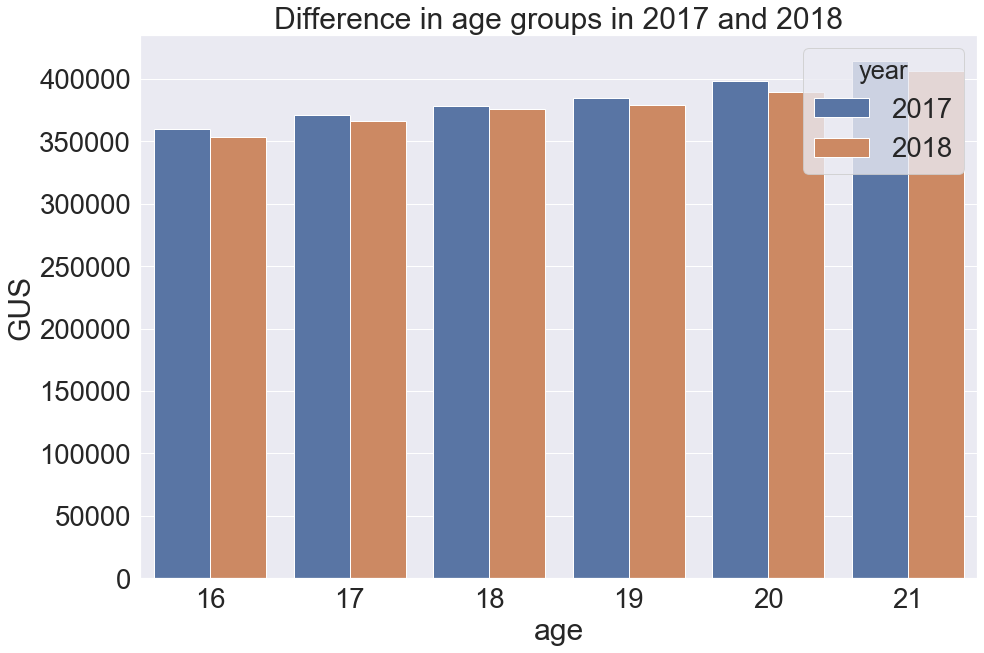

In [30]:
sns.barplot(
    x="age", y="GUS", hue="year",
    data=GUS_age_compare,
)
labels(title="Difference in age groups in 2017 and 2018")